In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import folium
from folium import plugins


## Load Dataset

In [ ]:
df_airbnb = pd.read_csv('./airbnb.csv')
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


# Check Data Info

In [ ]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43161 entries, 0 to 43160
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43161 non-null  int64  
 1   name                            43145 non-null  object 
 2   host_id                         43161 non-null  int64  
 3   host_name                       43140 non-null  object 
 4   neighbourhood_group             43161 non-null  object 
 5   neighbourhood                   43160 non-null  object 
 6   latitude                        43160 non-null  float64
 7   longitude                       43160 non-null  float64
 8   room_type                       43160 non-null  object 
 9   price                           43160 non-null  float64
 10  minimum_nights                  43160 non-null  float64
 11  number_of_reviews               43160 non-null  float64
 12  last_review                     

---

# Handle with null values

In [ ]:
df_airbnb.isna().sum()

id                                   0
name                                16
host_id                              0
host_name                           21
neighbourhood_group                  0
neighbourhood                        1
latitude                             1
longitude                            1
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       7312
reviews_per_month                 7312
calculated_host_listings_count       1
availability_365                     1
dtype: int64

In [ ]:
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.316100e+04,4.316100e+04,43160.000000,43160.000000,43160.000000,43160.000000,43160.000000,35849.000000,43160.000000,43160.000000
mean,1.688989e+07,5.655484e+07,40.728747,-73.952540,149.557785,7.032298,26.085913,1.274113,6.194972,106.298633
std,9.897987e+06,6.729437e+07,0.054371,0.045123,238.272709,21.016308,46.684909,1.618867,27.793203,130.298462
min,2.539000e+03,2.438000e+03,40.499790,-74.242850,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.305649e+06,6.900870e+06,40.689600,-73.982650,69.000000,1.000000,1.000000,0.170000,1.000000,0.000000
50%,1.728764e+07,2.565918e+07,40.722470,-73.955660,105.000000,3.000000,7.000000,0.600000,1.000000,31.000000
75%,2.533862e+07,8.311415e+07,40.763240,-73.937250,175.000000,5.000000,29.000000,1.890000,2.000000,213.000000
max,3.348804e+07,2.521913e+08,40.911690,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Menghapus data null pada kolom name, karena name tidak bisa diganti dengan data lain

In [ ]:
df_airbnb.dropna(subset=["name"], inplace=True)

Menghapus nilai null pada kolom host_name, karena seperti halnya kolom name, kolom host_name juga tidak bisa diganti dengan data lain

In [ ]:
df_airbnb.dropna(subset=["host_name"], inplace=True)


Menghapus nilai null pada kolom last_review dan reviews_per_month karena keduanya berhubungan dengan kolom number_of_reviews

In [ ]:
df_airbnb.dropna(subset=["last_review", "reviews_per_month"], inplace=True)

In [ ]:
df_airbnb.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Mulai mengidentifikasi nilai Outlier

In [ ]:
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.582700e+04,3.582700e+04,35827.000000,35827.000000,35827.000000,35827.000000,35827.000000,35827.000000,35827.000000,35827.000000
mean,1.671180e+07,5.662161e+07,40.728085,-73.951478,140.210874,6.068412,31.399224,1.274061,4.863594,111.641164
std,9.942282e+06,6.775034e+07,0.054918,0.045916,196.207258,17.917896,49.564534,1.618698,23.963119,129.241046
min,2.539000e+03,2.438000e+03,40.508680,-74.239860,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,7.930809e+06,6.451274e+06,40.688420,-73.982180,69.000000,2.000000,3.000000,0.170000,1.000000,0.000000
50%,1.726321e+07,2.503995e+07,40.721470,-73.954880,100.000000,2.000000,11.000000,0.600000,1.000000,47.000000
75%,2.514017e+07,8.410218e+07,40.763100,-73.936020,165.000000,4.000000,37.000000,1.890000,2.000000,223.000000
max,3.348673e+07,2.521913e+08,40.908040,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df_airbnb.sort_values(by='price', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000.0,100.0,2.0,2016-02-13,0.04,1.0,0.0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000.0,5.0,5.0,2017-07-27,0.16,1.0,0.0
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999.0,5.0,1.0,2015-01-02,0.02,1.0,0.0
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999.0,99.0,6.0,2016-01-01,0.14,1.0,83.0
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500.0,30.0,2.0,2018-09-18,0.18,1.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0.0,1.0,95.0,2019-06-23,4.35,6.0,222.0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0.0,30.0,2.0,2019-06-22,0.11,6.0,333.0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0.0,2.0,12.0,2017-10-27,0.53,2.0,0.0
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0.0,2.0,55.0,2019-06-24,2.56,4.0,127.0


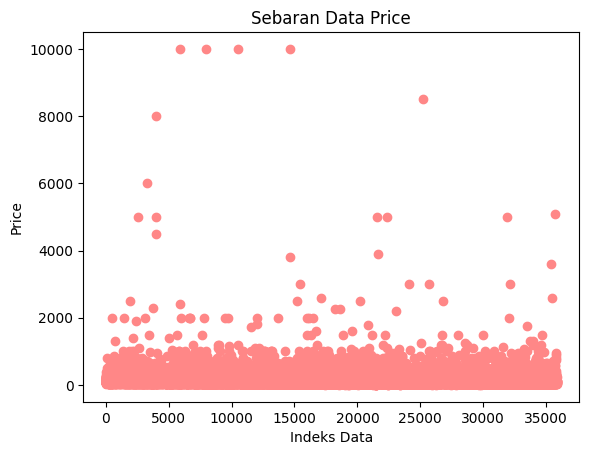

In [ ]:
price = df_airbnb['price']

plt.scatter(range(len(price)), price, color ='#FF8787')
plt.xlabel('Indeks Data')
plt.ylabel('Price')
plt.title('Sebaran Data Price')
plt.show()

Cari data outlier menggunakan z score

In [ ]:
from scipy import stats

z_scores = stats.zscore(price)

threshold = 3

outliers = df_airbnb[abs(z_scores) > threshold]

outliers.sort_values(by='price', ascending=True)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
34343,27237578,*NO GUEST SERVICE FEE* Beekman Tower One Bedro...,205031545,Red Awning,Manhattan,Midtown,40.75417,-73.96557,Entire home/apt,737.0,3.0,8.0,2019-06-02,1.02,49.0,188.0
34344,27237583,*NO GUEST SERVICE FEE* Beekman Tower Premium O...,205031545,Red Awning,Manhattan,Midtown,40.75402,-73.96567,Entire home/apt,737.0,3.0,1.0,2019-02-18,0.21,49.0,222.0
34346,27237591,*NO GUEST SERVICE FEE* One Bedroom Suite - Clo...,205031545,Red Awning,Manhattan,Midtown,40.75425,-73.96556,Entire home/apt,737.0,3.0,4.0,2019-05-28,0.36,49.0,249.0
34347,27237604,*NO GUEST SERVICE FEE* Luxury Midtown One Bedr...,205031545,Red Awning,Manhattan,Midtown,40.75294,-73.96731,Entire home/apt,737.0,3.0,2.0,2019-06-07,0.40,49.0,235.0
34348,27237606,*NO GUEST SERVICE FEE* Luxury One Bedroom Suit...,205031545,Red Awning,Manhattan,Midtown,40.75269,-73.96678,Entire home/apt,737.0,3.0,5.0,2019-05-27,1.17,49.0,230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500.0,30.0,2.0,2018-09-18,0.18,1.0,251.0
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999.0,99.0,6.0,2016-01-01,0.14,1.0,83.0
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999.0,5.0,1.0,2015-01-02,0.02,1.0,0.0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000.0,5.0,5.0,2017-07-27,0.16,1.0,0.0


Mengganti nilai outlier dengan nilai mean

In [ ]:
df_airbnb.loc[df_airbnb['price'] >= 737, 'price'] = price.mean()

df_airbnb.loc[df_airbnb['price'] >= 737]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Tampilkan data lagi

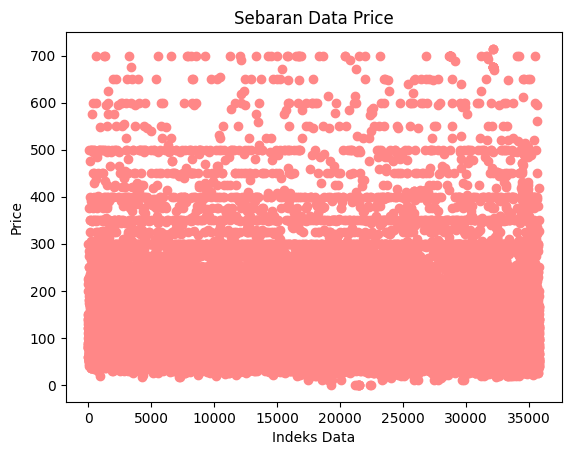

In [ ]:
price = df_airbnb['price']

plt.scatter(range(len(price)), price, color ='#FF8787')
plt.xlabel('Indeks Data')
plt.ylabel('Price')
plt.title('Sebaran Data Price')
plt.show()

Membersihkan data outliers pada kolom minimum_nights

In [ ]:
df_airbnb['minimum_nights'].max()

1250.0

Tampilkan grafik scatter plot outlier dari kolom minimum_nights

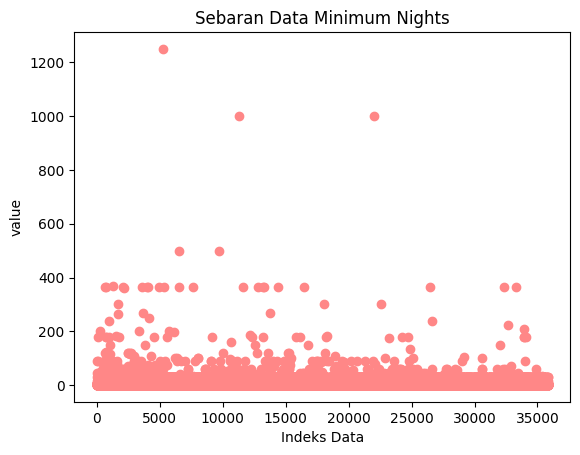

In [ ]:
minimum_nights = df_airbnb['minimum_nights']

plt.scatter(range(len(minimum_nights)), minimum_nights, color ='#FF8787')
plt.xlabel('Indeks Data')
plt.ylabel('value')
plt.title('Sebaran Data Minimum Nights')
plt.show()

Ternyata terdapat nilai outlier, saatnya untuk membersihkannya

In [ ]:
z_scores = stats.zscore(minimum_nights)

threshold = 3

outliers = df_airbnb[abs(z_scores) > threshold]

outliers.sort_values(by='minimum_nights', ascending=True)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
41926,32587884,Soho One Bedroom Apartment,244920495,Claudia,Manhattan,Little Italy,40.71919,-73.99654,Entire home/apt,120.0,60.0,1.0,2019-04-24,0.39,1.0,37.0
5263,3804690,Statue of Liberty Views Downtown,19550968,Silvia,Manhattan,Battery Park City,40.71019,-74.01705,Entire home/apt,130.0,60.0,4.0,2015-05-07,0.07,1.0,13.0
5142,3701708,Quaint Room in Brooklyn,18866837,Barbara,Brooklyn,Park Slope,40.67916,-73.97454,Private room,65.0,60.0,2.0,2016-09-07,0.03,1.0,0.0
20564,16352982,"Great Room &Host, steps from #1 train",60163700,Dee,Manhattan,Harlem,40.82378,-73.95354,Private room,50.0,60.0,13.0,2018-08-15,0.67,4.0,0.0
4959,3553679,Room in Upper East Side,2879920,Alberto,Manhattan,Upper East Side,40.76189,-73.96298,Private room,69.0,60.0,9.0,2016-04-04,0.16,2.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7355,5431845,Beautiful Fully Furnished 1 bed/bth,3680008,Aliya,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134.0,500.0,30.0,2018-06-24,0.57,1.0,90.0
11193,8668115,Zen Room in Crown Heights Brooklyn,8996336,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50.0,500.0,10.0,2016-09-22,0.22,1.0,365.0
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99.0,999.0,2.0,2018-01-04,0.07,1.0,42.0
26341,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79.0,999.0,24.0,2018-06-28,1.12,6.0,249.0


Mengganti nilai outlier dengan mean

In [ ]:
df_airbnb.loc[df_airbnb['minimum_nights'] >= 59, 'minimum_nights'] = minimum_nights.mean()

df_airbnb.loc[df_airbnb['minimum_nights'] >= 59]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Visualisasikan lagi

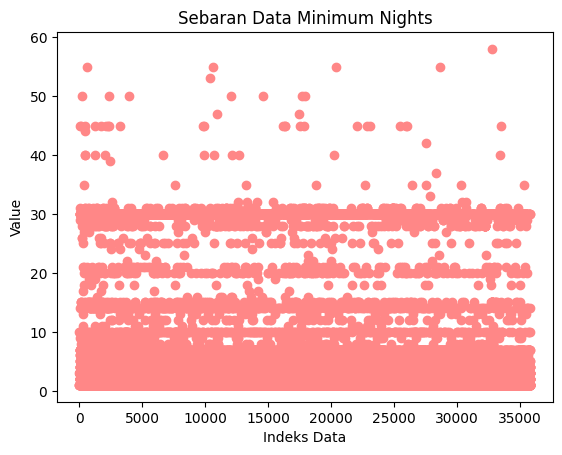

In [ ]:
minimum_nights = df_airbnb['minimum_nights']

plt.scatter(range(len(minimum_nights)), minimum_nights, color ='#FF8787')
plt.xlabel('Indeks Data')
plt.ylabel('Value')
plt.title('Sebaran Data Minimum Nights')
plt.show()

Analisis data outlier pada kolom reviews_per_month

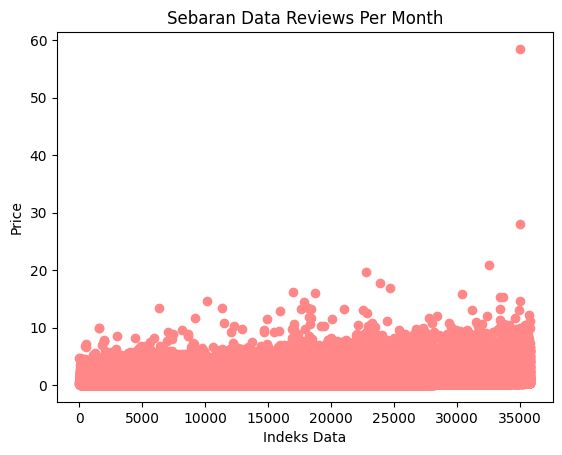

In [ ]:
reviews_per_month = df_airbnb['reviews_per_month']

plt.scatter(range(len(reviews_per_month)), reviews_per_month, color ='#FF8787')
plt.xlabel('Indeks Data')
plt.ylabel('Price')
plt.title('Sebaran Data Reviews Per Month')
plt.show()

Terdapat nilai outlier, kita cari menggunakan z_score

In [ ]:
z_scores = stats.zscore(reviews_per_month)

threshold = 3

outliers = df_airbnb[abs(z_scores) > threshold]

outliers.sort_values(by='reviews_per_month', ascending=True)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
37142,29518083,"Premier room in UWS NYC, Columbia, Central Park",222285897,Alvin,Manhattan,Morningside Heights,40.80392,-73.96556,Private room,120.0,1.0,52.0,2019-06-17,6.14,4.0,31.0
22011,17707963,"5mins from JFK, one cozy bedroom for one",119592255,Kevin,Queens,Jamaica,40.68090,-73.78196,Private room,50.0,1.0,173.0,2019-07-07,6.15,2.0,365.0
16145,13042752,Cozy Spacious Double Bed #1 Near JFK and J Train,62843071,Kevin And Kitty,Queens,Woodhaven,40.69617,-73.85204,Private room,45.0,1.0,235.0,2019-06-30,6.15,4.0,278.0
21581,17294950,A Room with a View at The Funky Loft,1432946,Marcella & Saidat,Brooklyn,Bushwick,40.69554,-73.92458,Private room,80.0,3.0,179.0,2019-07-03,6.17,3.0,191.0
40093,31121525,"Charming 2Br in the middle of LES, SoHo",214869202,Joey,Manhattan,Lower East Side,40.72181,-73.98946,Entire home/apt,250.0,1.0,36.0,2019-06-22,6.17,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28651,22176831,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50.0,1.0,341.0,2019-07-08,17.82,3.0,25.0
27287,21550302,JFK Comfort.5 Mins from JFK Private Bedroom & ...,156684502,Nalicia,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80.0,1.0,403.0,2019-07-06,19.75,3.0,26.0
38870,30423106,Lou's Palace-So much for so little,228415932,Louann,Queens,Rosedale,40.65417,-73.74158,Private room,45.0,1.0,37.0,2019-07-08,20.94,1.0,134.0
42076,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199.0,1.0,82.0,2019-07-07,27.95,9.0,299.0


Ubah nilai outlier dengan mean

In [ ]:
df_airbnb.loc[df_airbnb['reviews_per_month'] >= 6.42, 'reviews_per_month'] = reviews_per_month.mean()

df_airbnb.loc[df_airbnb['reviews_per_month'] >= 6.42]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Visualisasi ulang

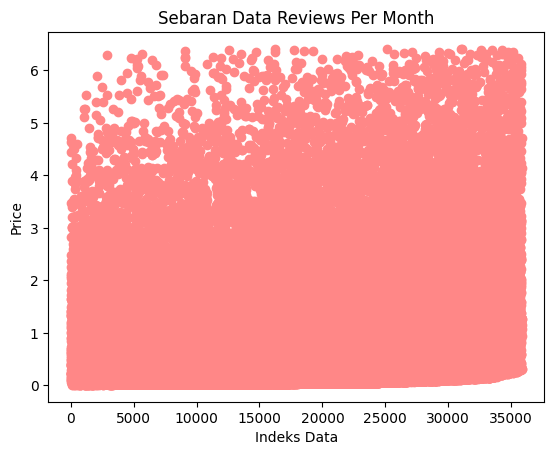

In [ ]:
reviews_per_month = df_airbnb['reviews_per_month']

plt.scatter(range(len(reviews_per_month)), reviews_per_month, color ='#FF8787')
plt.xlabel('Indeks Data')
plt.ylabel('Price')
plt.title('Sebaran Data Reviews Per Month')
plt.show()

1. Siapa saja pemilik rent home dengan jumlah airbnb terbanyak?
2. Siapa dan apa nama dari airbnb dengan jumlah review terbaik?
3. Siapa dan apa nama airbnb yang memilki harga termahal?
4. Siapa dan apa nama airbnb yang menyewakan home/apt denga  harga termurah/termahal?
5. Provinsi mana yang memiliki jumlah airbnb terbanyak?
6. Provinsi mana yang memiliki harga airbnb termahal?
7. Pada tanggal berapa orang itu banyak melakukan review tempat
8. Penyebaran tempat penginapan ada di kota mana?

# 1. Siapa saja pemilik rent home dengan jumlah properti Airbnb terbanyak?

In [ ]:
host_name_terbanyak = df_airbnb.host_name.value_counts()

top_5_host = host_name_terbanyak.head(5)

df_top_5_hosts = pd.DataFrame({'Host Name': top_5_host.index, 'Property Amount': top_5_host.values})

df_top_5_hosts

,Host Name,Property Amount
0,Michael,308
1,David,269
2,John,234
3,Alex,193
4,Sarah,175


Text(0.5, 1.0, 'Pemilik Dengan Jumlah Kepemilikan Penginapan Terbanyak di Airbnb')

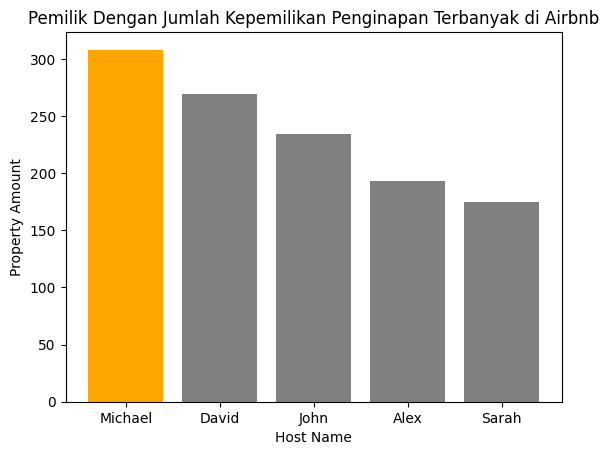

In [ ]:
x_coords = np.arange(len(top_5_host.index))
plt.bar(x_coords, top_5_host.values, tick_label = top_5_host.index, color=['orange', 'gray', 'gray', 'gray', 'gray'])
plt.xlabel('Host Name')
plt.ylabel('Property Amount')
plt.title("Pemilik Dengan Jumlah Kepemilikan Penginapan Terbanyak di Airbnb")


# 2. Apa nama dari airbnb dengan jumlah review terbanyak?

In [ ]:
top_5_airbnb_best_review = df_airbnb.sort_values(by='number_of_reviews', ascending=False).head()


In [ ]:
top_5_airbnb_best_review[['id', 'name', 'neighbourhood_group', 'neighbourhood', 'number_of_reviews']]

,id,name,neighbourhood_group,neighbourhood,number_of_reviews
11759,9145202,Room near JFK Queen Bed,Queens,Jamaica,629.0
2031,903972,Great Bedroom in Manhattan,Manhattan,Harlem,607.0
2030,903947,Beautiful Bedroom in Manhattan,Manhattan,Harlem,597.0
2015,891117,Private Bedroom in Manhattan,Manhattan,Harlem,594.0
13495,10101135,Room Near JFK Twin Beds,Queens,Jamaica,576.0


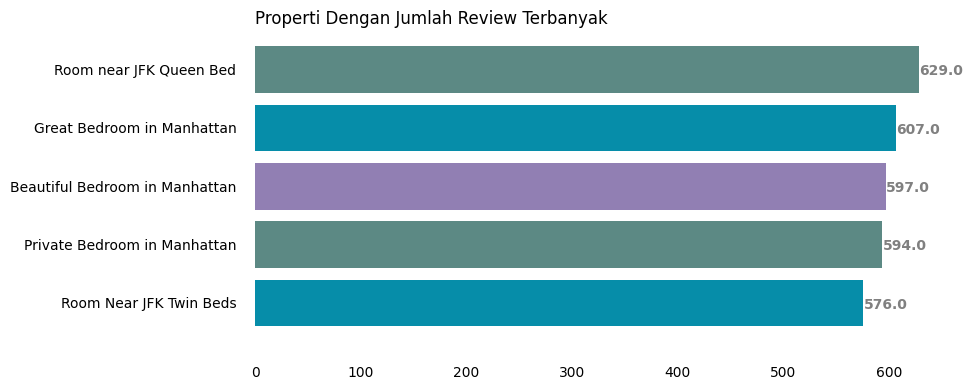

In [ ]:
top_5_airbnb_best_review_name = top_5_airbnb_best_review['name']
top_5_airbnb_best_review_number = top_5_airbnb_best_review['number_of_reviews']

fig, ax = plt.subplots(figsize =(9, 4))

ax.barh(top_5_airbnb_best_review_name, top_5_airbnb_best_review_number, color=['#5C8984', '#068DA9', '#917FB3',])

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 15)
ax.yaxis.set_tick_params(pad = 10)

# ax.grid(b = True, color ='grey',
 #        linestyle ='-.', linewidth = 0.5,
  #       alpha = 0.2)

ax.invert_yaxis()
 
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
ax.set_title('Properti Dengan Jumlah Review Terbanyak',
             loc ='left', )
 
 
# Show Plot
plt.show()


# 3. Apa nama Airbnb termahal di setiap Provinsi/Neighbourhood Group?

In [ ]:
df_airbnb_sort_price_expensive = df_airbnb.sort_values(by='price', ascending=False)

neighbourhood_group_expensive = df_airbnb_sort_price_expensive.groupby(by='neighbourhood_group').max()
neighbourhood_group_expensive[['name', 'neighbourhood', 'price']]

,name,neighbourhood,price
neighbourhood_group,,,
Bronx,⭐️Walk + Transit Score 97⭐️8min to Yankee Std⭐️,Woodlawn,670.0
Brooklyn,ｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞのかわいいお部屋です2,Windsor Terrace,700.0
Manhattan,️CENTRALLY LOCATED️- Great for Families + Groups,West Village,714.0
Queens,한성 韓城 Han C (2F),Woodside,700.0
Staten Island,幸福小屋,Willowbrook,625.0


In [ ]:
m = folium.Map([40.7128 , -74.0060], zoom_start=10,width="%100",height="%100")
locations = list(zip(neighbourhood_group_expensive.latitude, neighbourhood_group_expensive.longitude))
cluster = plugins.MarkerCluster(locations=locations,                     
               popups=neighbourhood_group_expensive["price"].tolist())  
m.add_child(cluster)
m

# 4. Apa nama airbnb yang menyewakan properti denga harga termurah?

In [ ]:
top_5_cheapest_airbnb = df_airbnb.sort_values(by='price', ascending=True).head(20)

top_5_cheapest_airbnb[['id', 'name', 'neighbourhood_group', 'neighbourhood', 'price', 'number_of_reviews']]

,id,name,neighbourhood_group,neighbourhood,price,number_of_reviews
25778,20624541,Modern apartment in the heart of Williamsburg,Brooklyn,Williamsburg,0.0,3.0
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",Brooklyn,Bedford-Stuyvesant,0.0,1.0
25796,20639914,Cozy yet spacious private brownstone bedroom,Brooklyn,Bedford-Stuyvesant,0.0,95.0
25795,20639792,Contemporary bedroom in brownstone with nice view,Brooklyn,Bedford-Stuyvesant,0.0,95.0
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,Bronx,East Morrisania,0.0,55.0
25794,20639628,Spacious comfortable master bedroom with nice ...,Brooklyn,Bedford-Stuyvesant,0.0,93.0
25753,20608117,"Sunny, Quiet Room in Greenpoint",Brooklyn,Greenpoint,0.0,12.0
26866,21304320,Best Coliving space ever! Shared room.,Brooklyn,Bushwick,0.0,5.0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,Brooklyn,Bushwick,0.0,2.0
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Brooklyn,Bushwick,0.0,16.0


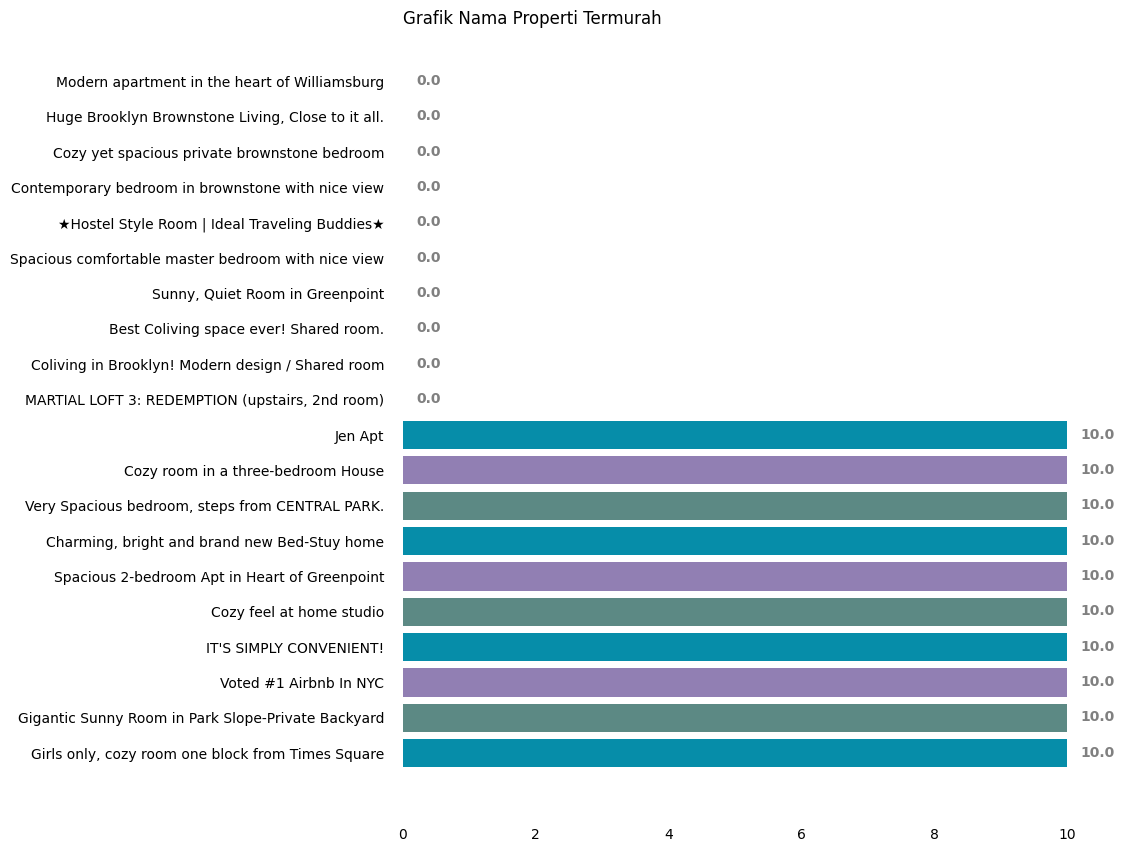

In [ ]:
top_5_cheapest_airbnb_name = top_5_cheapest_airbnb['name']
top_5_cheapest_airbnb_price = top_5_cheapest_airbnb['price']

fig, ax = plt.subplots(figsize =(9, 10))

ax.barh(top_5_cheapest_airbnb_name, top_5_cheapest_airbnb_price, color=['#5C8984', '#068DA9', '#917FB3',])

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 15)
ax.yaxis.set_tick_params(pad = 10)

# ax.grid(b = True, color ='grey',
 #        linestyle ='-.', linewidth = 0.5,
  #       alpha = 0.2)

ax.invert_yaxis()
 
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
ax.set_title('Grafik Nama Properti Termurah',
             loc ='left', )
 

 
# Show Plot
plt.show()


5. Provinsi/Neighbourhood Group mana yang memiliki jumlah airbnb terbanyak?

In [ ]:
df_neighbourhood_group = df_airbnb.groupby(by='neighbourhood_group').count()
df_neighbourhood_group = df_neighbourhood_group.rename(columns={'name' : 'Jumlah'})
df_neighbourhood_group = df_neighbourhood_group.sort_values(by='Jumlah', ascending=False)
df_neighbourhood_group[['Jumlah']]

,Jumlah
neighbourhood_group,
Brooklyn,15394
Manhattan,15283
Queens,4094
Bronx,774
Staten Island,282


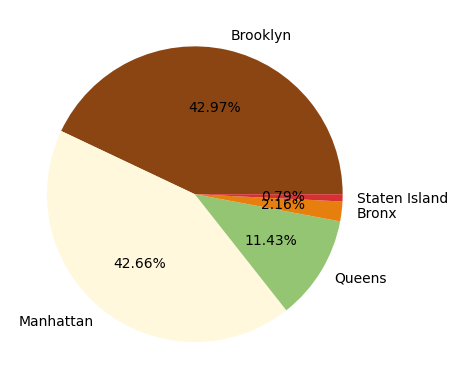

In [ ]:
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D','#D53032')

plt.pie(df_neighbourhood_group['Jumlah'], 
        labels=df_neighbourhood_group.index,
       autopct='%1.2f%%',
       colors=colors,
)
plt.show()


In [ ]:
lats_longs = list(map(list, zip(df_airbnb["latitude"],
                          df_airbnb["longitude"],)
               )
           )


In [ ]:
from folium.plugins import HeatMap


map_obj = folium.Map(location = [40.7128, -74.0060], zoom_start = 10)

HeatMap(lats_longs,
        blur = 18).add_to(folium.FeatureGroup(name='Heat Map').add_to(map_obj))
folium.LayerControl().add_to(map_obj)

map_obj

# 6. Pada tanggal berapa orang-orang banyak melakukan review tempat properti

In [ ]:
group_date_review = df_airbnb.groupby(by='last_review').sum()
group_date_review_sorted = group_date_review.sort_values(by='number_of_reviews', ascending=False).head()

group_date_review_sorted = group_date_review_sorted[['number_of_reviews']
]
group_date_review_sorted

<ipython-input-39-42819db8a7a6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_date_review = df_airbnb.groupby(by='last_review').sum()


,number_of_reviews
last_review,
2019-06-23,77619.0
2019-07-01,62107.0
2019-06-30,58627.0
2019-06-24,53096.0
2019-06-22,38716.0


Text(0.5, 1.0, 'Tanggal orang banyak melakukan review')

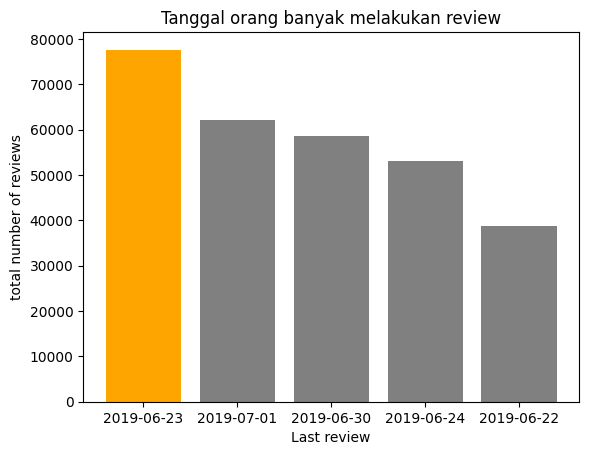

In [ ]:
last_review = group_date_review_sorted.index
number_of_reviews = group_date_review_sorted.number_of_reviews

plt.bar(last_review, number_of_reviews, color=['orange', 'gray', 'gray', 'gray', 'gray'])
plt.xlabel('Last review')
plt.ylabel('total number of reviews')
plt.title("Tanggal orang banyak melakukan review")


# 7. Tipe ruangan apa yang paling sering dikunjungi?

In [ ]:
df_airbnb.room_type.value_counts()

Entire home/apt    18701
Private room       16398
Shared room          728
Name: room_type, dtype: int64

Visualisasi data tipe ruangan

Text(0.5, 1.0, 'Grafik Hubungan Tipe Ruangan Dengan Jumlah Ruangan')

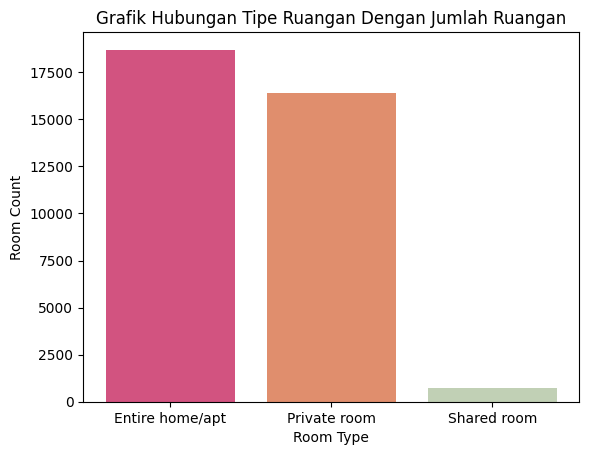

In [ ]:
room_type = df_airbnb['room_type'].value_counts()

x_coords = np.arange(len(room_type.index))
plt.bar(x_coords, room_type.values, tick_label = room_type.index, color=['#D25380', '#E08E6D', '#C1D0B5',])
plt.xlabel('Room Type')
plt.ylabel('Room Count')
plt.title("Grafik Jumlah Ruangan Ti")


In [ ]:
group_room_type_reviews = df_airbnb.groupby(by='room_type').sum()

group_room_type_reviews[['number_of_reviews']]

<ipython-input-43-0462355fb525>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_room_type_reviews = df_airbnb.groupby(by='room_type').sum()


,number_of_reviews
room_type,
Entire home/apt,573699.0
Private room,532449.0
Shared room,18792.0


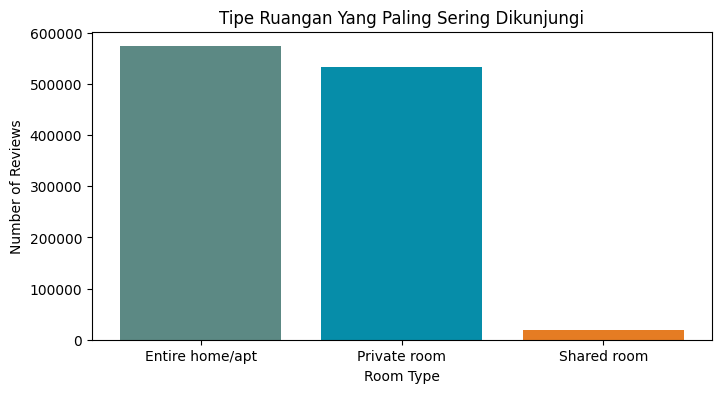

In [ ]:
fig = plt.figure(figsize = (8, 4))
plt.bar(group_room_type_reviews.index, group_room_type_reviews['number_of_reviews'],color=['#5C8984', '#068DA9', '#E57C23',])
plt.ylabel('Number of Reviews')
plt.xlabel('Room Type')
plt.title('Tipe Ruangan Yang Paling Sering Dikunjungi')
plt.show()


#8. Apakah ada korelasi antara jumlah ulasan (number of reviews) dan harga properti Airbnb?#


In [ ]:
df_airbnb[['price', 'number_of_reviews']]

,price,number_of_reviews
0,149.0,9.0
1,225.0,45.0
3,89.0,270.0
4,80.0,9.0
5,200.0,74.0
...,...,...
43154,115.0,19.0
43156,40.0,1.0
43157,80.0,4.0
43158,85.0,2.0


Visualisasi Data

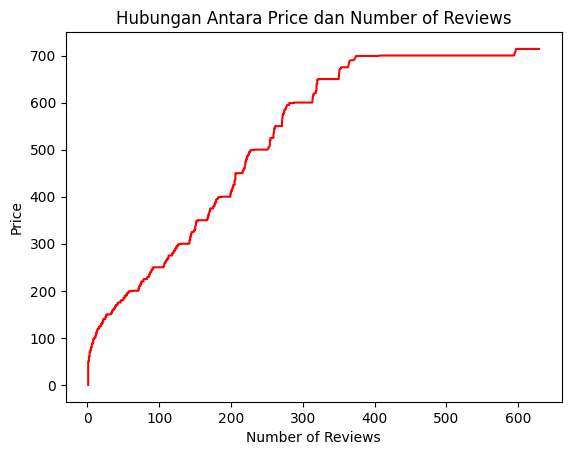

In [ ]:

# Define X and Y variable data
x = df_airbnb.number_of_reviews.sort_values()
y = df_airbnb.price.sort_values()

plt.plot(x, y, color='red')
plt.xlabel("Number of Reviews") # add X-axis label
plt.ylabel("Price") # add Y-axis label
plt.title("Hubungan Antara Price dan Number of Reviews") # add title
plt.show()
